<div align="center">

<h3 style="color:#3A86FF;">📊 PyNext Final Assignment — EDA & Insights</h3>
<h5 style="color:#FF006E;">Submitted by: <b>Ishat Noor Mahi</b></h5>
<h6 style="color:#8338EC;">ID: <b>Mahi-3006</b></h6>
<h6 style="color:#FB5607;">Dept: <b>STATISTICS | 2024-2025</b></h6>

</div>


<div align="center">
    <h5 style="color:#FFBE0B;"><b>1. Data Audit &amp; Cleaning (15 marks)</b></h5>
</div>


In [14]:
import numpy as np
import pandas as pd

In [123]:
#i. Load the dataset; print rows × columns and check student_id uniqueness.
path = 'C:/Users/DELL/PyNext/Datasets/pynext_simple_gradebook - pynext_simple_gradebook.csv' 
gradebook = pd.read_csv(path)

print(gradebook.shape)
#print(gradebook.columns) #to get the column names correctly

print(gradebook['student_id'].nunique())

gradebook.drop_duplicates(subset=['student_id'],keep='first',inplace=True)

print(gradebook.shape)

(306, 36)
300
(300, 36)


In [124]:
#ii. Show dtypes and % missing for each column.
info_df = pd.DataFrame(
    {
        'Column' : gradebook.columns,
        'Data_type': gradebook.dtypes.values,
        '%Missing_Value': ((gradebook.isna().sum()/len(gradebook)).round(4)*100).values
    },index=np.arange(1,len(gradebook.columns)+1)
)
print(info_df)
print(len(gradebook))

          Column Data_type  %Missing_Value
1     student_id    object            0.00
2           name    object            0.00
3           dept    object            0.00
4         gender    object            0.00
5       semester     int64            0.00
6        section    object            0.00
7      height_cm   float64            4.00
8      weight_kg   float64            4.00
9         att_T1     int64            0.00
10        att_T2     int64            0.00
11        att_T3     int64            0.00
12        att_T4     int64            0.00
13        att_T5     int64            0.00
14        att_T6     int64            0.00
15        att_T7     int64            0.00
16  submitted_A1     int64            0.00
17  submitted_A2     int64            0.00
18  submitted_A3     int64            0.00
19  submitted_A4     int64            0.00
20  submitted_A5     int64            0.00
21  submitted_A6     int64            0.00
22  submitted_A7     int64            0.00
23     onti

In [125]:
#iii. Normalize dept and gender to clean categories.

gradebook.groupby('dept')['dept'].count()

def normalize_dept(x):
    x = x.astype(str)
    x = x.str.lower().str.strip()

    mapping = {
        'c.s.e':'CSE','cse':'CSE',
        'e.e.e':'EEE','eleceng':'EEE','eee':'EEE',
        'ipe':'IPE',
        'mat':'MAT','mathematics':'MAT',
        'mee':'MEE',
        'phy':'PHY','physics':'PHY',
        'sta':'STA','statistics':'STA',
        'swe':'SWE','softwareeng':'SWE',      
    }

    return x.replace(mapping).str.upper()

gradebook['dept_clean'] = normalize_dept(gradebook['dept'])

print(gradebook.groupby('dept_clean')['student_id'].count())


dept_clean
CSE    129
EEE     63
IPE     13
MAT     20
MEE     14
PHY     20
STA     27
SWE     14
Name: student_id, dtype: int64


In [126]:
#iii. Normalize dept and gender to clean categories.


def normalize_gender(x):

    x = x.astype(str)
    x = x.str.strip().str.lower()

    mapping = {
        'f':'Female','female':'Female',
        "m":'Male', 'male':'Male',
        'other':'Other'
    }

    return x.replace(mapping)

gradebook['gender_clean'] = normalize_gender(gradebook['gender'])

gradebook.groupby('gender_clean')['student_id'].count()


gender_clean
Female    113
Male      183
Other       4
Name: student_id, dtype: int64

In [127]:
#iv. Detect outliers in height_cm and weight_kg using IQR; flag them.

def get_outliers(df,col):

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR

    mask = (col<lower_bound) | (col>upper_bound)
    flag_col = f"{col.name}_outlier_flag"
    df[flag_col] = mask
    outliers = df.loc[mask, [col.name, flag_col]]

    result = {
        'statement': (f"\nOutlier Detection for '{col.name}':\n"
        f"----------------------------------\n"
        f"Total Outliers Found: {mask.sum()}\n\n"
        f"Outlier Rows:\n{outliers.to_string(index=False)}\n"),
        'Number_of_outliers': mask.sum()
        }
        
    
    
    return result

In [128]:
hcm = gradebook['height_cm']
wkg = gradebook['weight_kg']

print(get_outliers(gradebook,hcm)['statement'])
print(get_outliers(gradebook,wkg)['statement'])


Outlier Detection for 'height_cm':
----------------------------------
Total Outliers Found: 3

Outlier Rows:
 height_cm  height_cm_outlier_flag
     120.0                    True
     230.0                    True
     120.0                    True


Outlier Detection for 'weight_kg':
----------------------------------
Total Outliers Found: 6

Outlier Rows:
 weight_kg  weight_kg_outlier_flag
     180.0                    True
      95.0                    True
      31.4                    True
       5.0                    True
     -10.0                    True
     -10.0                    True



<div align="center">
    <h5 style="color:#FFBE0B;"><b>2. Student-Level Summary (20 marks)</b></h5>
</div>


In [129]:
#i. Attended Sessions → The total number of sessions a student was present in.
att_cols = [c for c in gradebook.columns if c.startswith('att_')]
gradebook['sessions_attended'] = gradebook[att_cols].sum(axis=1)

#ii. Submitted Count → The total number of assignments the student has submitted.
sub_cols = [c for c in gradebook.columns if c.startswith('submitted_')]
gradebook['assignment_submitted'] = gradebook[sub_cols].sum(axis=1)

#iii. Total Marks → The sum of marks the student has received across all assignments.
mark_cols = [c for c in gradebook.columns if c.startswith('marks_')]
gradebook['total_marks'] = gradebook[mark_cols].sum(axis=1)

#iv. Mean Marks (Average) → The average of the student’s marks across assignments.
gradebook['mean_marks'] = gradebook[mark_cols].mean(axis=1).round(2)

#v. Median Marks → The middle value of the student’s marks.
gradebook['median_marks'] = gradebook[mark_cols].median(axis=1).round(2)

#vi. Best Mark → The highest mark the student got in any assignment.
gradebook['best_mark'] = gradebook[mark_cols].max(axis=1)

#vii. Worst Mark → The lowest mark the student got in any assignment.
gradebook['worst_mark'] = gradebook[mark_cols].min(axis=1)

#=====================================================#

#viii. Display the top 10 students by total_marks.

top_students = gradebook.sort_values(by='total_marks',ascending=False)
print(top_students.head(10))

    student_id             name   dept  gender  semester section  height_cm  \
59       S0085    Tanzim Biswas    CSE    Male         6       C      169.4   
269      S0061    Tamanna Uddin    CSE  Female         8       B      154.2   
297      S0118    Sakib Hossain    CSE    male         1       B      164.7   
136      S0005       Arif Hasan    STA  Female         5       B      148.9   
117      S0244      Anika Molla    STA  Female         3       B      157.5   
107      S0267  Raisa Chowdhury  C.S.E    Male         6       B      177.5   
277      S0204      Tahia Islam    EEE  Female         2       B      156.9   
142      S0280     Sifat Barman    CSE  Female         8       B      148.8   
230      S0114   Rafi Chowdhury    CSE   Other         3       D      160.0   
49       S0211     Jannat Hasan    MAT    Male         7       A      172.5   

     weight_kg  att_T1  att_T2  ...  gender_clean  height_cm_outlier_flag  \
59        72.7       1       1  ...          Male    

<div align="center">
    <h5 style="color:#FFBE0B;"><b>3. Assignment-Level Analysis (20 marks)</b></h5>
</div>


In [130]:
#i. Number Submitted → How many students submitted that assignment (i.e., non-missing marks).

sub_df = pd.DataFrame({
    'Assignment' : sub_cols,
    'Total_submissions': gradebook[sub_cols].sum().values
},index=np.arange(1,8))

#ii. Median Mark → The middle value of marks.
median_marks = gradebook[mark_cols].median()
#iii. Standard Deviation (std)
std_marks = gradebook[mark_cols].std()

print(sub_df)

     Assignment  Total_submissions
1  submitted_A1                236
2  submitted_A2                252
3  submitted_A3                246
4  submitted_A4                253
5  submitted_A5                249
6  submitted_A6                250
7  submitted_A7                242


In [131]:
#iv. Outlier Count
outlier_quantity = []
for mark_col in mark_cols:
    n = get_outliers(gradebook,gradebook[mark_col])['Number_of_outliers']
    outlier_quantity.append(n)

print(outlier_quantity)

[np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(2)]


In [133]:
##=======CREATE FINAL TABLE=========##

sub_df['median_mark'] = median_marks.values
sub_df['std_marks'] = std_marks.values
sub_df['Outlier Count'] = outlier_quantity
sub_df['Highest Mark'] = gradebook[mark_cols].max().values
sub_df['Lowest Mark'] = gradebook[mark_cols].min().values
print(sub_df)


     Assignment  Total_submissions  median_mark  std_marks  Outlier Count  \
1  submitted_A1                236         70.2  12.517567              0   
2  submitted_A2                252         70.0  12.078825              0   
3  submitted_A3                246         70.6  12.630838              0   
4  submitted_A4                253         71.0  11.817052              1   
5  submitted_A5                249         72.0  12.597348              1   
6  submitted_A6                250         70.1  13.167127              1   
7  submitted_A7                242         70.0  12.530949              2   

   Highest Mark  Lowest Mark  
1          98.4         44.9  
2          97.2         37.4  
3          99.5         43.7  
4          98.3         36.8  
5          98.4         33.5  
6          99.0         26.4  
7          99.0         -8.1  


In [134]:
# (a)
hardest = sub_df.loc[sub_df['median_mark'].idxmin()]
print("Hardest Assignment:", hardest['Assignment'])
print(hardest)
print('\n#======================================#\n')
most_variable = sub_df.loc[sub_df['std_marks'].idxmax()]
print("Most Variable Assignment:", most_variable['Assignment'])
print(most_variable)


Hardest Assignment: submitted_A2
Assignment           submitted_A2
Total_submissions             252
median_mark                  70.0
std_marks               12.078825
Outlier Count                   0
Highest Mark                 97.2
Lowest Mark                  37.4
Name: 2, dtype: object

#======================================#

Most Variable Assignment: submitted_A6
Assignment           submitted_A6
Total_submissions             250
median_mark                  70.1
std_marks               13.167127
Outlier Count                   1
Highest Mark                 99.0
Lowest Mark                  26.4
Name: 6, dtype: object


<div align="center">
    <h5 style="color:#FFBE0B;"><b>4. Visuals (20 marks)</b></h5>
</div>


Text(0.5, 1.0, 'Histogram of All Marks (Stacked from All Assignments)')

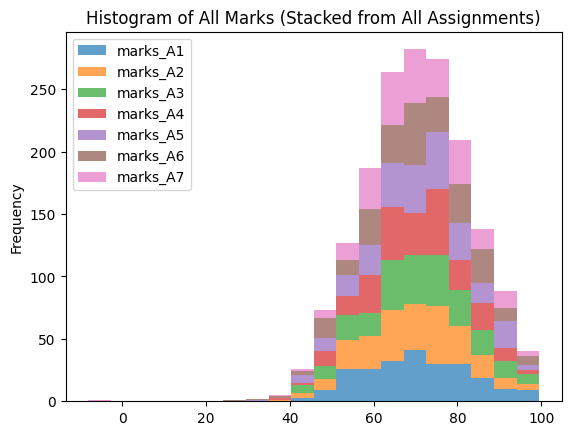

In [110]:
#i. Histogram of all marks (stacked from all assignments).

import matplotlib.pyplot as plt 
gradebook[mark_cols].plot.hist(stacked=True, bins=20, alpha=0.7)
plt.title('Histogram of All Marks (Stacked from All Assignments)')

Text(0.5, 1.0, 'Boxplot of Marks by Assignment')

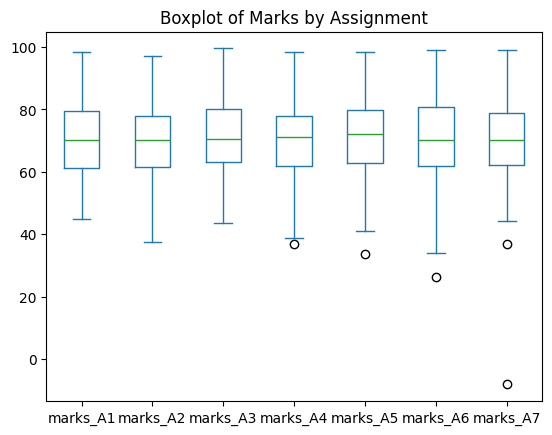

In [113]:
#ii. Boxplot of marks by assignment.

gradebook[mark_cols].plot.box()
plt.title('Boxplot of Marks by Assignment')


<Axes: >

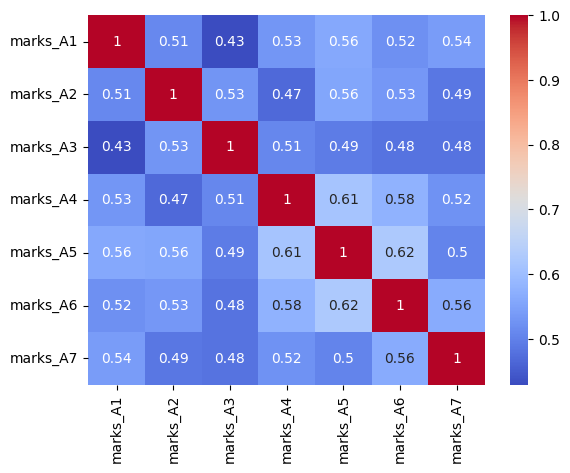

In [114]:
#iii. Correlation heatmap of marks
import seaborn as sns
sns.heatmap(gradebook[mark_cols].corr(), annot=True, cmap='coolwarm')   

<div align="center">
    <h5 style="color:#FFBE0B;"><b>5. Group Comparison (15 marks)</b></h5>
</div>


In [122]:
#1.Pivot table: mean marks (average across assignments per student) and total marks (sum across assignments per student) by dept × section.
pivot_table = pd.pivot_table(
    gradebook,
    values=['mean_marks', 'total_marks'],
    index=['dept_clean', 'section'],
    aggfunc={'mean_marks': 'mean', 'total_marks': 'sum'},
    fill_value=0
).round(2)
pivot_table

mean_marks  total_marks
dept_clean section                         
CSE        A             68.51      12943.7
           B             72.50      17222.0
           C             69.01      13948.8
           D             71.56       7322.9
EEE        A             70.68       8046.5
           B             70.44       8425.3
           C             72.04       5686.8
           D             69.45       3778.7
IPE        A             68.88       1717.6
           B             74.46       1422.2
           C             65.88       1323.3
           D             71.58       1171.3
MAT        A             67.39       2948.1
           B             70.52       1406.5
           C             72.81       1828.7
           D             61.66       1540.7
MEE        A             77.39       1138.8
           B             72.93       1540.8
           C             64.88        705.6
           D             69.77       1814.0
PHY        A             65.44       2082.8
           B             69.70       2380.8
           C             64.69       1376.8
           D             67.96       1980.8
STA        A             67.92       2377.8
           B             72.46       5281.0
           C             74.68       2692.0
           D             81.97        974.9
SWE        A             70.79       1774.6
           B             70.08       2313.9
           C             66.65        669.9
           D             65.48       1051.0

In [119]:
#ii. Report the cell with the highest total_marks.
max_total_marks = pivot_table['total_marks'].max()
highest_cell = pivot_table[pivot_table['total_marks'] == max_total_marks]
highest_cell

,,mean_marks,total_marks
dept_clean,section,,
CSE,B,72.5,17222.0


<div align="center">
    <h5 style="color:#FFBE0B;"><b>6. Export &amp; Insights (10 marks)</b></h5>
</div>


In [135]:
#i. Save final_gradebook.csv with cleaned + summary columns (Include all the new summary columns you created in your final_gradebook.csv).
gradebook.to_csv('final_gradebook.csv', index=False)